In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1. Load and Visualise the Data
- Download
- Load
- Visulaise
- Normailse

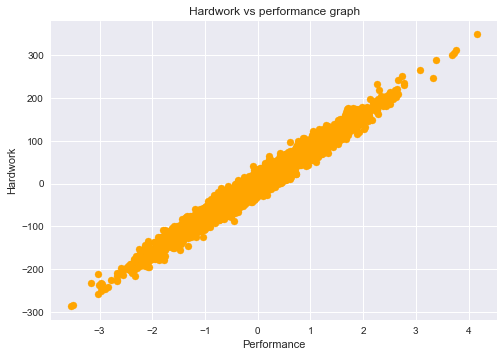

In [89]:
# Load
X = pd.read_csv("./Training Data/Linear_X_Train.csv")
y = pd.read_csv("./Training Data/Linear_Y_Train.csv")

X = X.values
y = y.values

# Normalise
u = X.mean()
std = X.std()
X = (X-u)/std

# Visualise
plt.style.use("seaborn")
plt.scatter(X,y,color="orange")
plt.title("Hardwork vs performance graph")
plt.xlabel("Performance")
plt.ylabel("Hardwork")
plt.show()


# Step 2. Linear Gradient

In [90]:
def hypothesis(x,theta):
    y_ = theta[0]+theta[1]*x
    return y_

def gradient(X,Y,theta):

    grad = np.zeros((2,))
    m = X.shape[0];
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*X[i]
    
    return grad/m

def get_error(X,y,theta):
    y_ = hypothesis(X,theta)
    error = np.sum((y-y_)**2)
    return error/X.shape[0]

def gradientDescent(X,y,max_steps=100,learning_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(max_steps):
        grad = gradient(X,y,theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        error_list.append(get_error(X,y,theta))
        theta_list.append((theta[0],theta[1]))
    return theta,error_list,theta_list

In [91]:
theta,error_list,theta_list = gradientDescent(X,y)

In [92]:
print(theta)

[ 0.6838508  79.90361453]


In [93]:
y_ = hypothesis(X,theta)

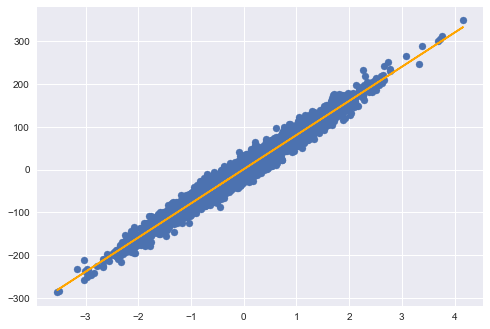

In [94]:
plt.scatter(X,y)
plt.plot(X,y_,color='orange')
plt.show()

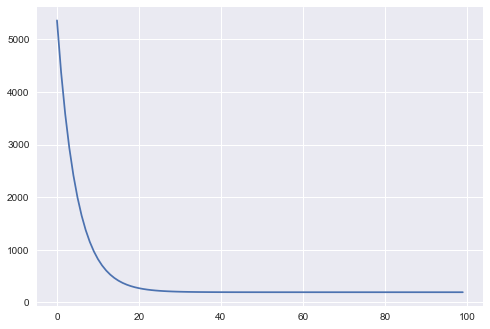

In [95]:
plt.plot(error_list)

# Step 3. Make Predictions

In [96]:
x_test = pd.read_csv("./Test Cases/Linear_X_Test.csv")
x_test = x_test.values

In [97]:
y_test = hypothesis(x_test,theta)

In [98]:
y_test = pd.DataFrame(y_test,columns=["y"])

In [99]:
y_test.head()

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897


In [100]:
y_test.to_csv("predictions.csv",index=False)

# Step 4. Calculating R2 score on train data

In [101]:
def get_score(X,y,theta):
    y_ = hypothesis(X,theta)
    num = np.sum((y-y_)**2)
    den = np.sum((y-np.mean(y))**2)
    
    score = 1 - (num/den)
    return score*100

In [102]:
# R2 score on our train data
print(get_score(X,y,theta))

97.09612226971643


# Step 5. Visualising Loss Function, Gradient Descent, Theta Updates

In [103]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [104]:
theta

array([ 0.6838508 , 79.90361453])

**1. Visualising Loss**

In [105]:
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
print(T0.shape)
print(T1.shape)
print(T0)
print(T1)

(80, 80)
(80, 80)
[[-40 -39 -38 ...  37  38  39]
 [-40 -39 -38 ...  37  38  39]
 [-40 -39 -38 ...  37  38  39]
 ...
 [-40 -39 -38 ...  37  38  39]
 [-40 -39 -38 ...  37  38  39]
 [-40 -39 -38 ...  37  38  39]]
[[ 40  40  40 ...  40  40  40]
 [ 41  41  41 ...  41  41  41]
 [ 42  42  42 ...  42  42  42]
 ...
 [117 117 117 ... 117 117 117]
 [118 118 118 ... 118 118 118]
 [119 119 119 ... 119 119 119]]


In [119]:
J = np.zeros(T0.shape)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        y_ = T0[i,j] + T1[i,j]*X
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]

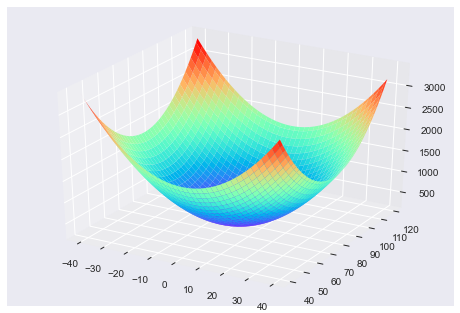

In [120]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

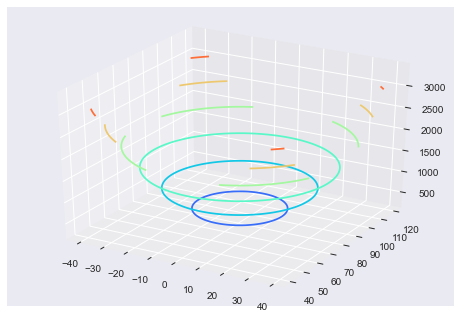

In [121]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

**2. Visualising Theta Changes**

In [122]:
theta_list = np.array(theta_list)
print(theta_list.shape)

(100, 2)


[]

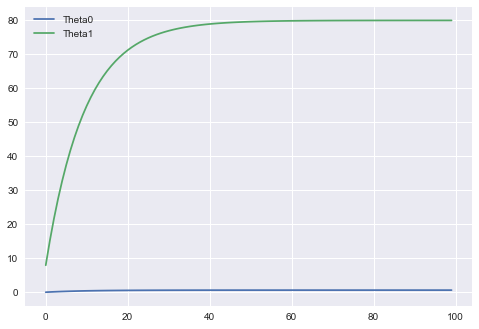

In [123]:
plt.plot(theta_list[:,0],label='Theta0')
plt.plot(theta_list[:,1],label='Theta1')
plt.legend()
plt.plot()

**3.Trajectory traced by Theta Updates in the Loss Function**

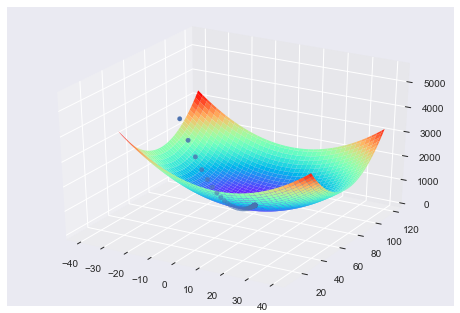

In [124]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

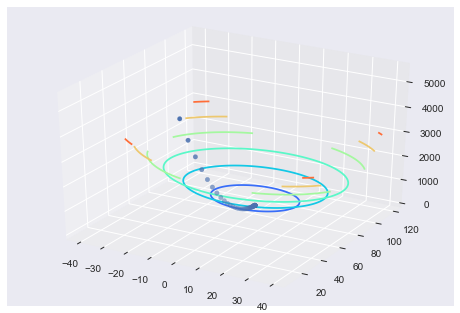

In [126]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

### 2-D contour plots

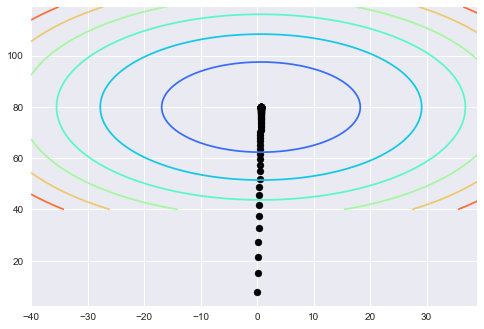

In [129]:
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],color='black')
plt.show()

In [131]:
np.save("theta_list.npy",theta_list)